# Loan Application Status Prediction Case Study

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Importing the required libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Loading the dataset
data=pd.read_csv('LoanStatus.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
# Dataframe for dataset
ds=pd.DataFrame(data=data)

# EDA

In [31]:
# Gettign information about data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Key Observation: 1) We have 614 rows and 13 columns in the dataset. 
2) There are 8 object type variables and 5 numeric.

In [32]:
# checking null values
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are null values  in Gender,Married,Dependents,Self employed and Loan Amount etc.

<AxesSubplot:>

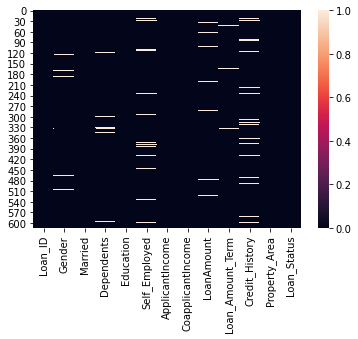

In [33]:
sns.heatmap(ds.isnull())

The heat map shows there are null values present in the variables.

In [34]:
#Summary Statistics
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Key observation:1) Thers is large differnce between the values of 75% and 'max' in some of the columns.
    2)There is no diifernce between mean and median(50%) in almost all of the column.
    3) There is large standard deviation in most oif the columns.
    

<AxesSubplot:>

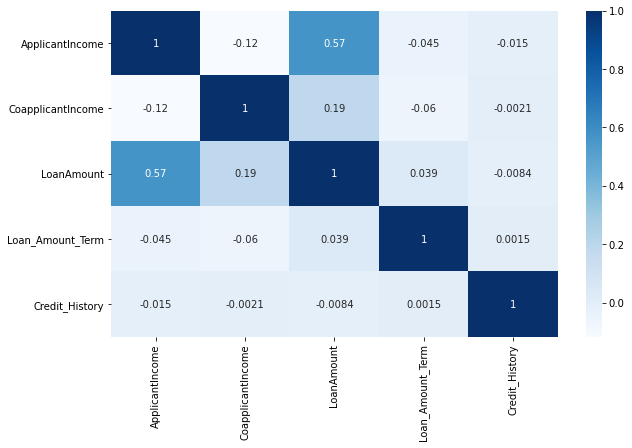

In [35]:
# Correlation Matrix ---Pearson Method
fig =plt.figure(figsize=(10,6))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

Key Observations: 1) Applicant income and Loan Amount have positive correlation.
                  2)Credit history and loan amount have weak negative relationship

<AxesSubplot:xlabel='Gender', ylabel='count'>

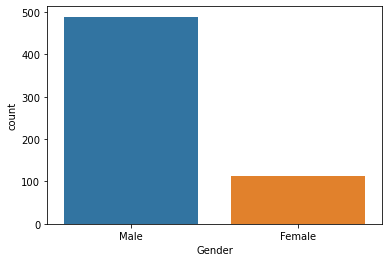

In [36]:
sns.countplot(x='Gender',data=ds)

Key Observation: 80% male and 20% women have applied for the loan

<AxesSubplot:xlabel='Married', ylabel='count'>

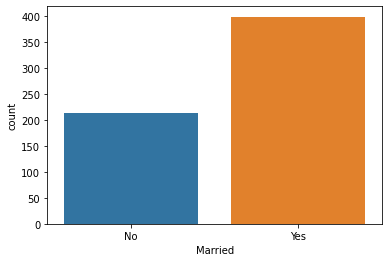

In [37]:
sns.countplot(x='Married',data=ds)

Key Observation: 66% married  and 34% unmarried have applied for the loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

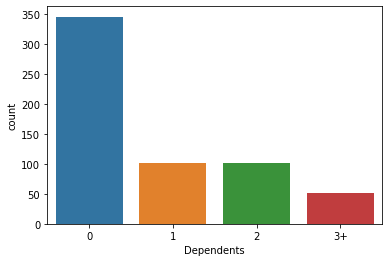

In [38]:
sns.countplot(x='Dependents',data=ds)

Key Observation: 60% have no dependent,16% have one depedent, 16% have 2 depedent and 8 % have more than 3 depedentans of those who ghave applied for the loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

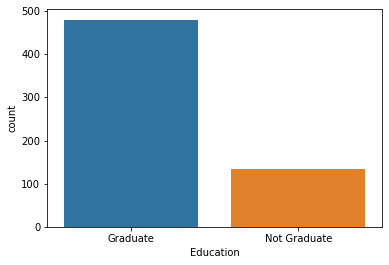

In [39]:
sns.countplot(x='Education',data=ds)

Key Obsservaion 80% of the loan applicat are graduated.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

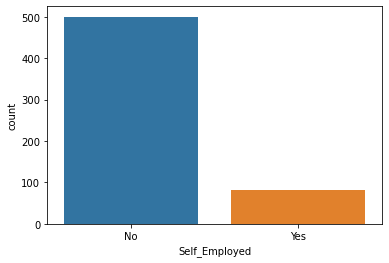

In [40]:
sns.countplot(x='Self_Employed',data=ds)

Key Obsservaion: 20% of the loan applicat are self employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

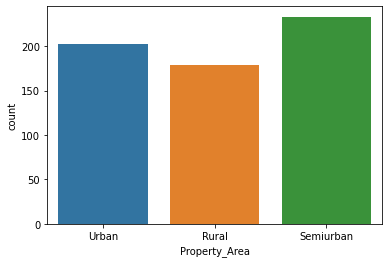

In [41]:
sns.countplot(x='Property_Area',data=ds)

Key Observation:45% of the loan applicant  belong to semiurban and 33% belong to Urban area.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

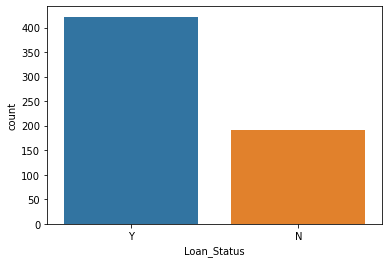

In [42]:
sns.countplot(x='Loan_Status',data=ds)

There is class imbalance

<AxesSubplot:>

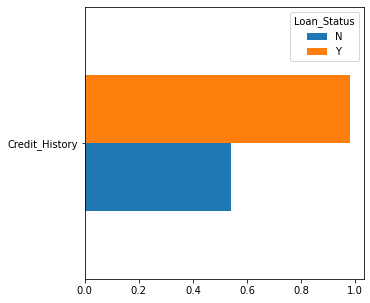

In [43]:
ds.groupby('Loan_Status')[['Credit_History']].mean().T.plot(kind='barh', figsize=(5,5))

pople with credit history 1 have more the chance of getting loan.

<AxesSubplot:>

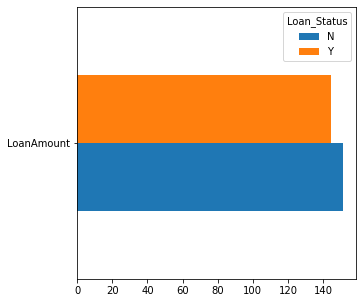

In [44]:
ds.groupby('Loan_Status')[['LoanAmount']].mean().T.plot(kind='barh', figsize=(5,5))

Lower the loan amount higher the chance of getting the loan.

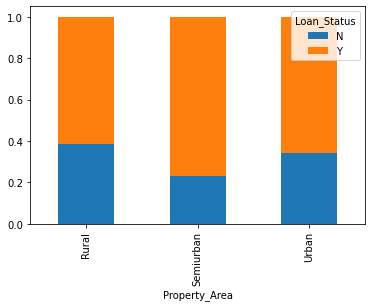

In [45]:
Property_Area=pd.crosstab(ds['Property_Area'],ds['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

The ration of loan approved in Semiurban area is higher compared to the Rural and Urban Area.

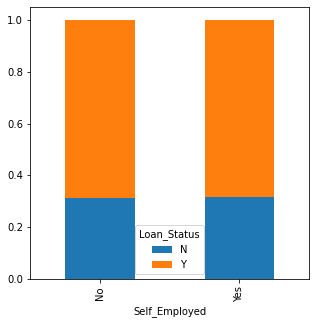

In [46]:
Self_Employed=pd.crosstab(ds['Self_Employed'],ds['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

There is no significance between Self_employed and Loan_status

# Finding Outliers and Skewness

ApplicantIncome         AxesSubplot(0.125,0.125;0.133621x0.755)
CoapplicantIncome    AxesSubplot(0.285345,0.125;0.133621x0.755)
LoanAmount            AxesSubplot(0.44569,0.125;0.133621x0.755)
Loan_Amount_Term     AxesSubplot(0.606034,0.125;0.133621x0.755)
Credit_History       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

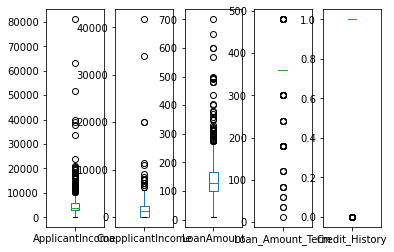

In [47]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,5))

We can see there are outliers in most of the column except 'Year'.Lets check separately for each column

<AxesSubplot:>

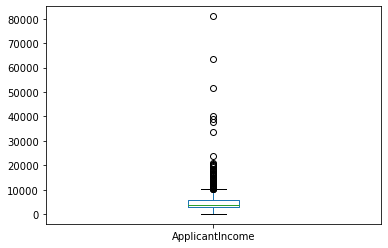

In [48]:
ds['ApplicantIncome'].plot.box()

<AxesSubplot:>

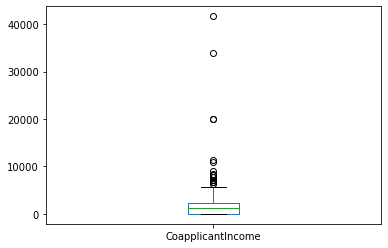

In [49]:
ds['CoapplicantIncome'].plot.box()

<AxesSubplot:>

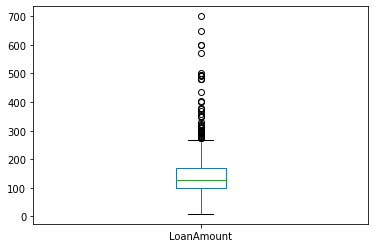

In [50]:
ds['LoanAmount'].plot.box()

<AxesSubplot:>

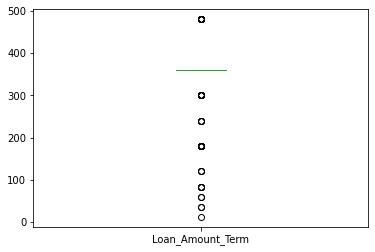

In [51]:
ds['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

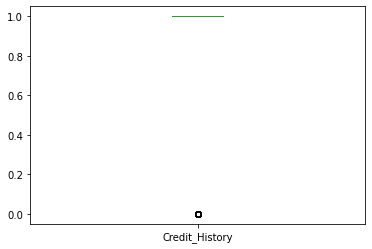

In [52]:
ds['Credit_History'].plot.box()

We can depict from the above figure that there are outliers in all the columns excpet year, however we are not going to remove the outliers from objet type variabels and target variabel..

In [53]:
#Checkking skewness
ds.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features.

# Data Wrangling

In [54]:
#replacing missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
imd = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
ds['LoanAmount']=imp.fit_transform(data['LoanAmount'].values.reshape(-1,1))
ds['Loan_Amount_Term']=imp.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1))
ds['Dependents']=imd.fit_transform(data['Dependents'].values.reshape(-1,1))
ds['Gender']=imd.fit_transform(data['Gender'].values.reshape(-1,1))[:,0]
ds['Married']=imd.fit_transform(data['Married'].values.reshape(-1,1))[:,0]
ds['Self_Employed']=imd.fit_transform(data['Self_Employed'].values.reshape(-1,1))[:,0]
ds['Credit_History']=imd.fit_transform(data['Credit_History'].values.reshape(-1,1))[:,0]
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [55]:
# checking null values again
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
# Defining data frame having int type variables having outliers, excluding obj type variables
m=ds[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [57]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2], dtype=int64))


In [58]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 25 rows will be droped

shape before remooving the outliers: (614, 13)
shape after remooving the outliers: (589, 13)


In [59]:
#Checkking skewness
dsnew.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -2.010069
dtype: float64

In [60]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if dsnew[i].dtypes=='object':
        dsnew[i]=oe.fit_transform(dsnew[i].values.reshape(-1,1))
dsnew

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,584.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,585.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,586.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,587.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

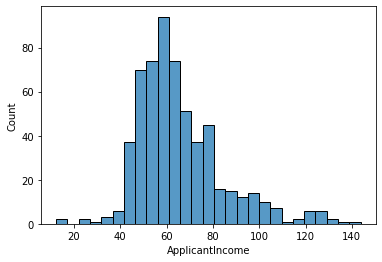

In [61]:
#Removing skewness
dsnew['ApplicantIncome']=np.sqrt(dsnew['ApplicantIncome'])
sns.histplot(dsnew['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

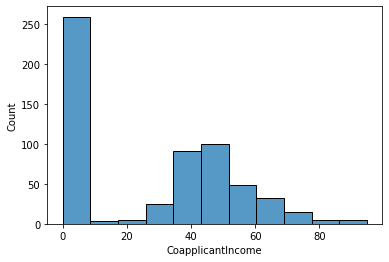

In [62]:
#Removing skewness
dsnew['CoapplicantIncome']=np.sqrt(dsnew['CoapplicantIncome'])
sns.histplot(dsnew['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

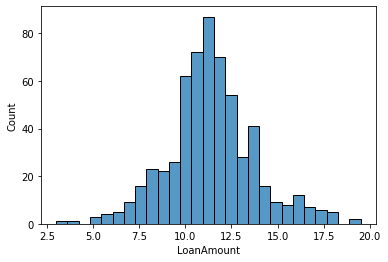

In [63]:
#Removing skewness
dsnew['LoanAmount']=np.sqrt(dsnew['LoanAmount'])
sns.histplot(dsnew['LoanAmount'])

In [64]:
#Checkking skewness
dsnew.skew()

Loan_ID              0.000000
Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      1.214219
CoapplicantIncome    0.217598
LoanAmount           0.230632
Loan_Amount_Term    -2.433130
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

In [65]:
dsnew.shape

(589, 13)

In [66]:
x=dsnew.drop(columns=['Loan_Status'])
y=dsnew['Loan_Status']

In [67]:
x.shape

(589, 12)

In [68]:
y.shape

(589,)

In [69]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [70]:
x_over.shape

(814, 12)

In [71]:
y_over.shape

(814,)

In [72]:
y_over.value_counts()

0.0    407
1.0    407
Name: Loan_Status, dtype: int64

In [73]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[-1.73472175,  0.51898783, -1.35866402, ...,  0.26713758,
         0.5866136 ,  1.27874007],
       [-1.72878841,  0.51898783,  0.80558535, ...,  0.26713758,
         0.5866136 , -1.3162207 ],
       [-1.72285507,  0.51898783,  0.80558535, ...,  0.26713758,
         0.5866136 ,  1.27874007],
       ...,
       [ 1.54953441,  0.51898783,  0.80558535, ...,  0.56892954,
        -1.562551  , -0.01874032],
       [-0.21510893, -0.99343545, -0.42427528, ...,  0.26713758,
         0.5866136 , -0.75604909],
       [-0.3163288 ,  0.19728558, -1.35866402, ..., -2.87482672,
         0.5866136 ,  1.12190971]])

In [74]:
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8244897959183674 on random state 4


In [75]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(412, 12)
(177, 12)
(412,)
(177,)


70% of the data (412 rows) will be available for training the model & 30% (177 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [76]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8361581920903954
[[ 29  27]
 [  2 119]]
              precision    recall  f1-score   support

         0.0       0.94      0.52      0.67        56
         1.0       0.82      0.98      0.89       121

    accuracy                           0.84       177
   macro avg       0.88      0.75      0.78       177
weighted avg       0.85      0.84      0.82       177



In [77]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8361581920903954
[[ 29  27]
 [  2 119]]
              precision    recall  f1-score   support

         0.0       0.94      0.52      0.67        56
         1.0       0.82      0.98      0.89       121

    accuracy                           0.84       177
   macro avg       0.88      0.75      0.78       177
weighted avg       0.85      0.84      0.82       177



In [78]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7457627118644068
[[ 31  25]
 [ 20 101]]
              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58        56
         1.0       0.80      0.83      0.82       121

    accuracy                           0.75       177
   macro avg       0.70      0.69      0.70       177
weighted avg       0.74      0.75      0.74       177



In [79]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.632768361581921
[[  2  54]
 [ 11 110]]
              precision    recall  f1-score   support

         0.0       0.15      0.04      0.06        56
         1.0       0.67      0.91      0.77       121

    accuracy                           0.63       177
   macro avg       0.41      0.47      0.41       177
weighted avg       0.51      0.63      0.55       177



In [80]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.6836158192090396
[[  0  56]
 [  0 121]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        56
         1.0       0.68      1.00      0.81       121

    accuracy                           0.68       177
   macro avg       0.34      0.50      0.41       177
weighted avg       0.47      0.68      0.56       177



In [81]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8418079096045198
[[ 32  24]
 [  4 117]]
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70        56
         1.0       0.83      0.97      0.89       121

    accuracy                           0.84       177
   macro avg       0.86      0.77      0.79       177
weighted avg       0.85      0.84      0.83       177



In [82]:
# Ada Boost Classifer
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8305084745762712
[[ 29  27]
 [  3 118]]
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70        56
         1.0       0.83      0.97      0.89       121

    accuracy                           0.84       177
   macro avg       0.86      0.77      0.79       177
weighted avg       0.85      0.84      0.83       177



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision. Accuracy_Score 1)
LogisticRegression 0.84 2).Gaussian Naive_bayes 0.84 3)DecisionTreeClassifier 0.74 (4) Random Forest Classifier 0.82 5)AdaBoost Classifier 0.84 6)KNN Calssifier 0.66

Logistic regression & Gaussian NB classifier have the best accuracy score and highest precision and F1 values among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

Cross check the accuracy of the algorithim used above

In [83]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.80508475 0.78813559 0.77966102 0.86440678 0.81196581]
0.8098507895118064 0.02961930678298099


In [84]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.8220339  0.78813559 0.77118644 0.86440678 0.82905983]
0.8149645081848472 0.03264813142822704


In [85]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.69491525 0.62711864 0.72033898 0.73728814 0.48717949]
0.6533681008257279 0.09117184493442883


In [86]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.69491525 0.69491525 0.68644068 0.68644068 0.69230769]
0.6910039113428944 0.003845601356910762


In [87]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.55932203 0.60169492 0.68644068 0.71186441 0.56410256]
0.6246849196001738 0.06306362755339998


In [88]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.60169492 0.77118644 0.77966102 0.81355932 0.7008547 ]
0.733391279153991 0.07536423443689087


In [89]:
adscores =cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.83050847 0.77966102 0.77966102 0.8559322  0.76923077]
0.8029986962190353 0.03402443688632501


It can be observed that the'Logistic Regression Classifier' algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Logistc regression" is the best model for predicting the Loan Application Status.

# AUC ROC Curve

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

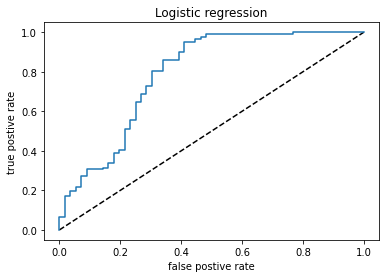

0.7506641086186541

In [91]:
#AUC score for Lostic rerssion model
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

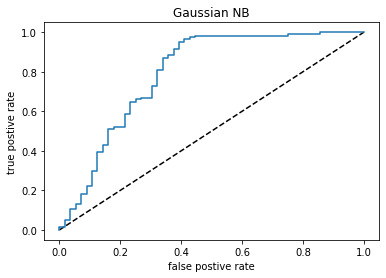

0.6941410861865408

In [92]:
#AUC score for Gaussian NB model
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Gaussian NB')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

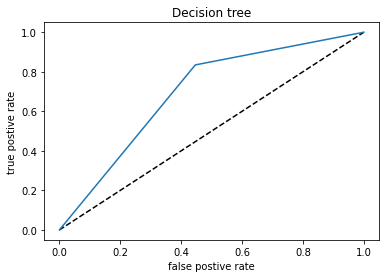

0.6941410861865408

In [93]:
#AUC score for Decision Tree model
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

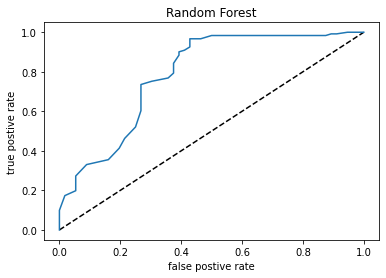

0.769185360094451

In [94]:
#AUC score for Random Forest model
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

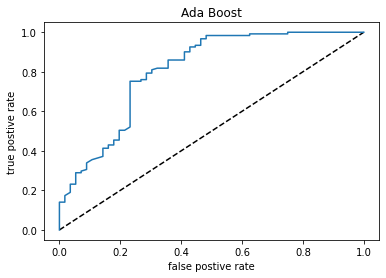

0.7465318772136953

In [95]:
#AUC score for Add Boost model
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boost classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Ada Boost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Key Observations: Logistic Regression Model has highest area under the curve. And AUC ROC score is 75%.It means our model can predict 75% effectively.
    

# HyperParameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV 
parameter={'random_state':np.arange(40,100), 'penalty':['l2','elasticne','none'],'class_weight':['balanced','dict'],'multi_class':['auto', 'ovr', 'multinomial'],'solver':['newton-cg','lbfgs','sag','saga','liblinear']}


In [97]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', 'dict'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2', 'elasticne', 'none'],
                         'random_state': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']})

In [99]:
GCV.best_params_

{'class_weight': 'dict',
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 40,
 'solver': 'newton-cg'}

In [100]:
# Logistic regression Model
final_Loan=LogisticRegression(class_weight='dict',penalty='l2',multi_class='auto',solver='newton-cg',random_state=40)
final_Loan.fit(x_train,y_train)
pred=final_Loan.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8361581920903954
[[ 29  27]
 [  2 119]]
              precision    recall  f1-score   support

         0.0       0.94      0.52      0.67        56
         1.0       0.82      0.98      0.89       121

    accuracy                           0.84       177
   macro avg       0.88      0.75      0.78       177
weighted avg       0.85      0.84      0.82       177



# Save the best Model

In [101]:
import joblib
joblib.dump(final_Loan,'Model_Loan Apllication-Status.obj')

['Model_Loan Apllication-Status.obj']